# Лабораторная работа №2

## Подготовка библиотек и функций

In [1]:
# Python 3.8
import pandas as pd
import numpy  as np

import sklearn
from sklearn import linear_model
from sklearn import ensemble
from sklearn import metrics
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler

%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import cm
import seaborn as sns


# Проверка версий библиотек
for lib in [pd, np, sklearn]:
    print(f"{lib.__name__:<12} {lib.__version__}")

# Проверка версии и пути к выбранному интерпретатору
import sys
print(f"Версия Python - {sys.version}")
print(f"Путь к интерпретатору Python - {sys.executable}")



pandas       2.1.0
numpy        1.24.3
sklearn      1.3.0
Версия Python - 3.9.6 (tags/v3.9.6:db3ff76, Jun 28 2021, 15:26:21) [MSC v.1929 64 bit (AMD64)]
Путь к интерпретатору Python - c:\users\user1\appdata\local\programs\python\python39\python.exe


In [2]:
def PLOT34(y_test, y_pred):
    '''
    Функция построения графиков
    :param y_test: - проверочные значения целевой переменный
    :param y_pred: - вычисленные значения целевой переменный
    '''
    plt.figure(figsize=(12,6))

    # == Диаграмма рассеяния вычисленных значений ==
    # создать первое полотно 121: 1-строк, 2-столбцов, 1-индекс текущего полотна в сетке
    plt.subplot(121)
    plt.scatter(y_test, y_pred,  alpha=0.1)
    plt.scatter(y_test, y_test,  alpha=0.1)
    plt.title('Диаграмма рассеяния вычисленных значений');
    plt.xlabel('Проверочное Y')
    plt.ylabel('Вычисленное Y')


    # == Диаграмма рассеяния ошибок ==
    # создать первое полотно 121: 1-строк, 2-столбцов, 2-индекс текущего полотна в сетке
    plt.subplot(122)
    plt.scatter(y_test, (y_test - y_pred)**2,  alpha=0.1)
    plt.title('Диаграмма рассеяния квадрата абсолютной ошибки')
    plt.xlabel('Проверочное Y')
    plt.ylabel('Квадрат абсолютной ошибки')
#--------------------------------------------------------------------------

In [3]:
def GET_METRICS_SINGLE(y_test, y_pred):
    '''
    Вычисление и вывод метрик: MAE, RMSE, R2.
    На основе сравнения проверочных и вычисленных.
    :param y_test: - проверочные значения целевой переменный
    :param y_pred: - вычисленные значения целевой переменный
    '''
    mae  = metrics.mean_absolute_error        (y_test, y_pred)
    mse  = metrics.mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2   = metrics.r2_score                   (y_test, y_pred)

    print ("MAE : {:>9,.3f} (средняя абсолютная ошибка)".format              ( mae ))
    print ("MSE : {:>9,.6f} (среднеквадратичная ошибка)".format( mse ))
    print ("RMSE: {:>9,.6f} (кв. корень из среднеквадратичной ошибки)".format( rmse ))
    print ("R2  : {:>9,.3f} (коэфф. детерминации)".format                    ( r2 ))
#--------------------------------------------------------------------------

In [4]:
def PLOT43(y_test,y_pred):
    plt.figure(figsize=(6,4))
    # Гистограмма и Плотность распределения - sns.distplot
    # data = y_true - y_pred
    sns.histplot( data = y_test - y_pred,
                  color="red",
                  kde=True, # оценка плотности в виде кривой
                  stat="density",# density: общая площадь равна 1
                )
    # Осевая линия
    plt.plot(
        [0, 0],
        [0, 10 * pow(10,-7)], '--', lw=2, c='r')
    
    plt.ylabel(u'Плотность')
    plt.xlabel(u'Значение ошибки')
    plt.title(u'Плотность распределения и гистограмма ошибок');
    plt.show()

## Загрузка данных

   1. Выполнить загрузку файла с подготовленным набором данных (отчищенный от пропусков и выбросов для целевой и независимых переменных) в таблицу _df_

In [5]:
df = pd.read_csv('./datasets/bike-sharing-dataset_nan_without_deviations.csv', # путь к файлу, (используй автодотолнение)
                   sep=',', # разделитель данных в файле
                   header=0, # номер строки с заголовками, нумерация с нуля
                   # header='None', # если заголовки отсутствуют
                  )
print("Размер таблицы", df.shape)
df[:2]

Размер таблицы (14949, 16)


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1.0,1.0,0.0,1.0,0.0,0.0,6.0,0.0,1.0,0.24,0.2879,0.81,0.0,3.0,13.0,16.0
1,2.0,1.0,0.0,1.0,1.0,0.0,6.0,0.0,1.0,0.22,0.2727,0.80,0.0,8.0,32.0,40.0


In [6]:
# df['temp']=(df['temp']*41+271)*1000
# df['windspeed']=df['windspeed']*67

 2. Объявить список независимых и целевой переменных

In [7]:
features = [ 'hum', 'temp',  'hr', 'weekday', 'windspeed' ]
# features = [ 'hum', 'temp', 'windspeed' ]
target   = ['cnt']

   3. Оставить в таблице данных _df_ столбцы, относящиеся только к списку независимых и целевой переменных

In [8]:
df

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1.0,1.0,0.0,1.0,0.0,0.0,6.0,0.0,1.0,0.24,0.2879,0.81,0.0000,3.0,13.0,16.0
1,2.0,1.0,0.0,1.0,1.0,0.0,6.0,0.0,1.0,0.22,0.2727,0.80,0.0000,8.0,32.0,40.0
2,3.0,1.0,0.0,1.0,2.0,0.0,6.0,0.0,1.0,0.22,0.2727,0.80,0.0000,5.0,27.0,32.0
3,4.0,1.0,0.0,1.0,3.0,0.0,6.0,0.0,1.0,0.24,0.2879,0.75,0.0000,3.0,10.0,13.0
4,5.0,1.0,0.0,1.0,4.0,0.0,6.0,0.0,1.0,0.24,0.2879,0.75,0.0000,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14944,17375.0,1.0,1.0,12.0,19.0,0.0,1.0,1.0,2.0,0.26,0.2576,0.60,0.1642,11.0,108.0,119.0
14945,17376.0,1.0,1.0,12.0,20.0,0.0,1.0,1.0,2.0,0.26,0.2576,0.60,0.1642,8.0,81.0,89.0
14946,17377.0,1.0,1.0,12.0,21.0,0.0,1.0,1.0,1.0,0.26,0.2576,0.60,0.1642,7.0,83.0,90.0
14947,17378.0,1.0,1.0,12.0,22.0,0.0,1.0,1.0,1.0,0.26,0.2727,0.56,0.1343,13.0,48.0,61.0


In [9]:
df = df[features+target]
print("Размер таблицы", df.shape)
df[:2]

Размер таблицы (14949, 6)


,hum,temp,hr,weekday,windspeed,cnt
0,0.81,0.24,0.0,6.0,0.0,16.0
1,0.80,0.22,1.0,6.0,0.0,40.0


## Выполнить процедуры стандартизации каждого признака (столбца) и сохранить в отдельную таблицу _df_scaled_

In [10]:
df_scaled= (df - df.mean())/df.std(ddof=0)

1. Получите величину среднего значения и среднеквадратического отклонения для целевой переменной

In [11]:
print('Для обычных данных')

for i in df:
    print(i)
    print ("Среднекв. откл. (Stand._dev.)", df[i].std(ddof=0))
    print ("Дисперсия (Variance) ", df[i].var(ddof=0))
    print ("Средрее (Mean)", df[i].mean())


print('Для стандартизированных данных')

for i in df_scaled:
    print(i)
    print ("Среднекв. откл. (Stand._dev.)", df[i].std(ddof=0))
    print ("Дисперсия (Variance) ", df[i].var(ddof=0))
    print ("Средрее (Mean)", df[i].mean())

df_scaled.to_csv('./datasets/bike-sharing-dataset_standart.csv', index=False)

Для обычных данных
hum
Среднекв. откл. (Stand._dev.) 0.1886147978289704
Дисперсия (Variance)  0.03557554196006337
Средрее (Mean) 0.644748143688541
temp
Среднекв. откл. (Stand._dev.) 0.19100777861498547
Дисперсия (Variance)  0.036483971491431295
Средрее (Mean) 0.4815412402167369
hr
Среднекв. откл. (Stand._dev.) 7.155568033242568
Дисперсия (Variance)  51.20215387836292
Средрее (Mean) 11.182152652351327
weekday
Среднекв. откл. (Stand._dev.) 1.9501569987557918
Дисперсия (Variance)  3.803112319796197
Средрее (Mean) 2.9907686132851694
windspeed
Среднекв. откл. (Stand._dev.) 0.11202424048424707
Дисперсия (Variance)  0.012549430456072421
Средрее (Mean) 0.18049432069034715
cnt
Среднекв. откл. (Stand._dev.) 131.27186284388858
Дисперсия (Variance)  17232.3019745047
Средрее (Mean) 148.07619238745067
Для стандартизированных данных
hum
Среднекв. откл. (Stand._dev.) 0.1886147978289704
Дисперсия (Variance)  0.03557554196006337
Средрее (Mean) 0.644748143688541
temp
Среднекв. откл. (Stand._dev.) 0.19100

2. Для целевой переменной построить гистограммы распределения стандартизированых и  исходных значений

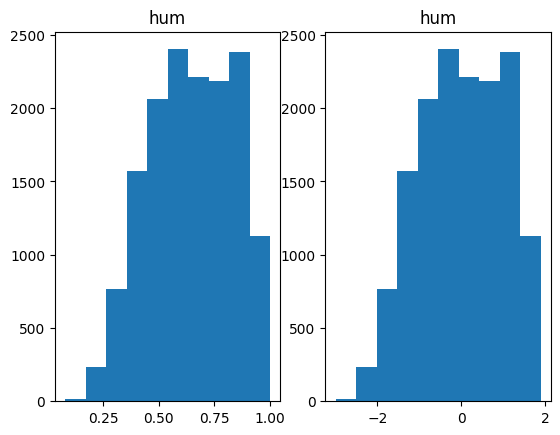

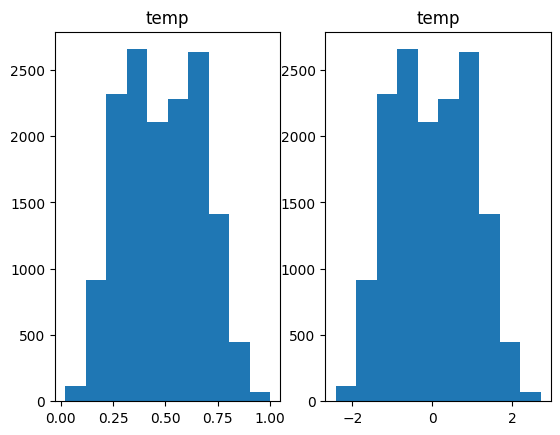

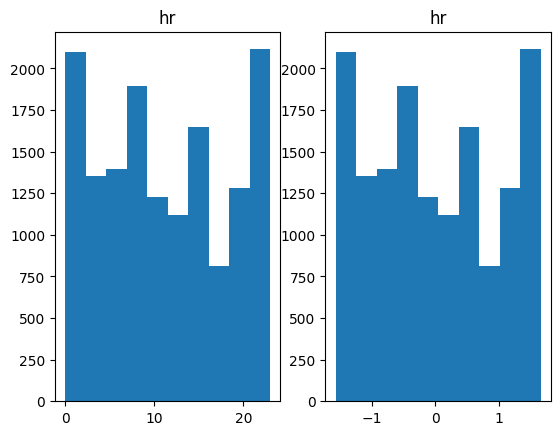

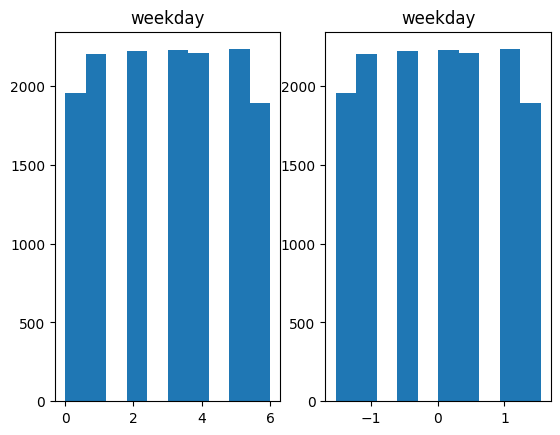

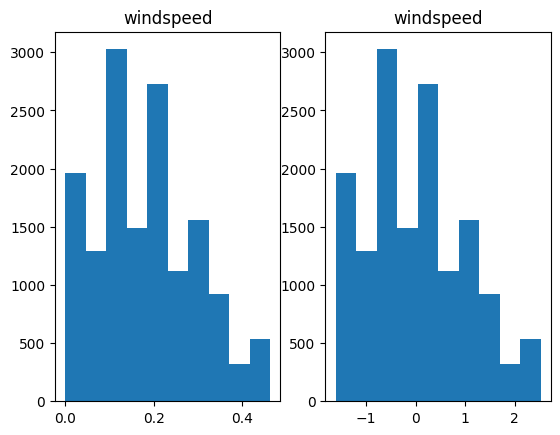

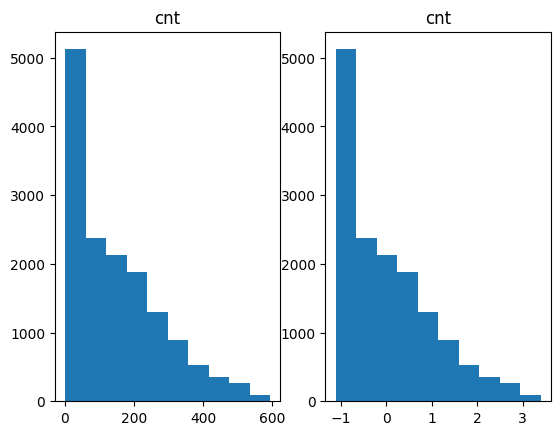

In [12]:
for i in df:
    plt.subplot(121)
    plt.hist(df[i])
    plt.title(i)
    plt.subplot(122)
    plt.hist(df_scaled[i])
    plt.title(i)
    plt.show()

# Пункты 3-4

## Разделите каждую из таблиц _df_ и _df_scaled_ на обучающую и проверочную части:

 1. Выберите значение для начального состояния генератора случайных чисел (ГСЧ)

In [13]:
rand_seed = 8 

 2. Получите результат разделения таблицы _df_ (НЕ стандартизированная выборка): _x__train_ , _x__test_ , _y__train_ , _y__test_

In [14]:
valid_size = 0.3 # доля тестовой части в выборке
x_train, x_test, y_train, y_test =  train_test_split(
    df[features],    # исходные данные X
    df[target],      # исходные данные y

    test_size = valid_size, # доля тестовой части в выборке
    random_state=rand_seed, # начальное состояние генератора случ. чисел
    shuffle=True            # перемешивание
)
y_train = y_train['cnt']
y_test = y_test['cnt']

print(x_train[:2])
print()
print(y_train[:2])
print()
print ("Кол-во элементов: \n  x_train: {}, y_train {} \n  x_test:  {}, y_test  {} \n  total x: {}, total y {} ".format  (
    len(x_train), len(y_train),
    len(x_test),  len(x_test),
    len(x_train)+len(x_test), len(y_train)+len(x_test),
))


       hum  temp    hr  weekday  windspeed
6228  0.66  0.38   4.0      6.0     0.0896
7227  0.77  0.46  19.0      1.0     0.0000

6228      8.0
7227    308.0
Name: cnt, dtype: float64

Кол-во элементов: 
  x_train: 10464, y_train 10464 
  x_test:  4485, y_test  4485 
  total x: 14949, total y 14949 


In [45]:
print(x_test[:3])
print(y_test[:3])

        hum  temp   hr  weekday  windspeed
13863  0.93  0.24  6.0      6.0     0.0896
2904   0.94  0.52  5.0      2.0     0.2537
4781   0.74  0.66  7.0      6.0     0.1940
13863    16.0
2904     22.0
4781     44.0
Name: cnt, dtype: float64


 3. Получите результат разделения таблицы _df_scaled_ (Стандартизированная выборка): _xStd__train_ , _xStd__test_ , _yStd__train_ , _yStd__test_

In [16]:
xStd_train, xStd_test, yStd_train, yStd_test =  train_test_split(
    df_scaled[features],    # исходные данные X
    df_scaled[target],      # исходные данные y

    test_size = valid_size, # доля тестовой части в выборке
    random_state=rand_seed, # начальное состояние генератора случ. чисел
    shuffle=True            # перемешивание
)

yStd_train = yStd_train['cnt']
yStd_test = yStd_test['cnt']


print(xStd_train[:2])
print()
print(yStd_train[:2])

           hum      temp        hr   weekday  windspeed
6228  0.080862 -0.531608 -1.003715  1.543071  -0.811381
7227  0.664062 -0.112777  1.092554 -1.020825  -1.611208

6228   -1.067069
7227    1.218264
Name: cnt, dtype: float64


## Построить две модели методом SGDRegressor: на НЕ стандартизированных  (m1) и на стандартизированных (m2) данных. Для каждой из моделей m1, m2:

Нестандартизированные данные

In [17]:
# 1. Создать объект класса с моделью стохастического градиентного спуска
m1 = linear_model.SGDRegressor(
    max_iter=10000,
    tol=1e-3,
    random_state=rand_seed,
)

# 2. Обучим модель (подберем/подогоним параметры модели)  на НЕ СТАНДАРТИЗИРОВАНОМ проверочном наборе
m1.fit(  x_train,  y_train)

# 3. Получить вычисленные(predicted) зн. на НЕ СТАНДАРТИЗИРОВАНОМ проверочном наборе
y_pred = m1.predict(x_test)

print(m1.coef_)

[-138.80633415  220.03374101    8.34510551    0.85024221   20.61536436]


Стандартизированные данные

In [18]:
# 1. Создать объект класса с моделью стохастического градиентного спуска
m2 = linear_model.SGDRegressor(
    max_iter=10000,
    tol=1e-3,
    random_state=rand_seed,
)

# 2. Обучим модель (подберем/подогоним параметры модели)  на НЕ СТАНДАРТИЗИРОВАНОМ проверочном наборе
m2.fit(  xStd_train,  yStd_train)

# 3. Получить вычисленные(predicted) зн. на НЕ СТАНДАРТИЗИРОВАНОМ проверочном наборе
yStd_pred = m2.predict(xStd_test)

print(m2.coef_)

[-0.19575577  0.31426501  0.3627818   0.01735526  0.04406059]


1. Получить метрики RMSE, R2

Нестандартизированные данные

In [19]:
GET_METRICS_SINGLE(y_test,y_pred)

MAE :    83.346 (средняя абсолютная ошибка)
MSE : 11,616.678026 (среднеквадратичная ошибка)
RMSE: 107.780694 (кв. корень из среднеквадратичной ошибки)
R2  :     0.311 (коэфф. детерминации)


In [20]:
m1.coef_

array([-138.80633415,  220.03374101,    8.34510551,    0.85024221,
         20.61536436])

In [21]:
m2.coef_

array([-0.19575577,  0.31426501,  0.3627818 ,  0.01735526,  0.04406059])

Стандартизированные данные

In [22]:
GET_METRICS_SINGLE(yStd_test,yStd_pred)

MAE :     0.604 (средняя абсолютная ошибка)
MSE :  0.643586 (среднеквадратичная ошибка)
RMSE:  0.802238 (кв. корень из среднеквадратичной ошибки)
R2  :     0.342 (коэфф. детерминации)


2. Построить диаграмму рассеяния вычисленных значений от проверочных значений

Нестандартизированные данные

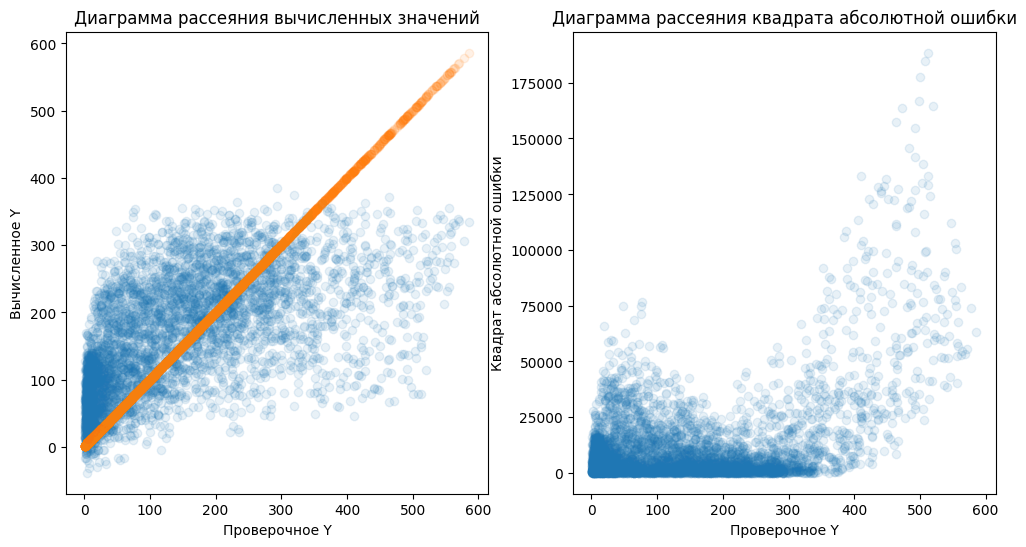

In [23]:
PLOT34(y_test,y_pred)

Стандартизированные данные

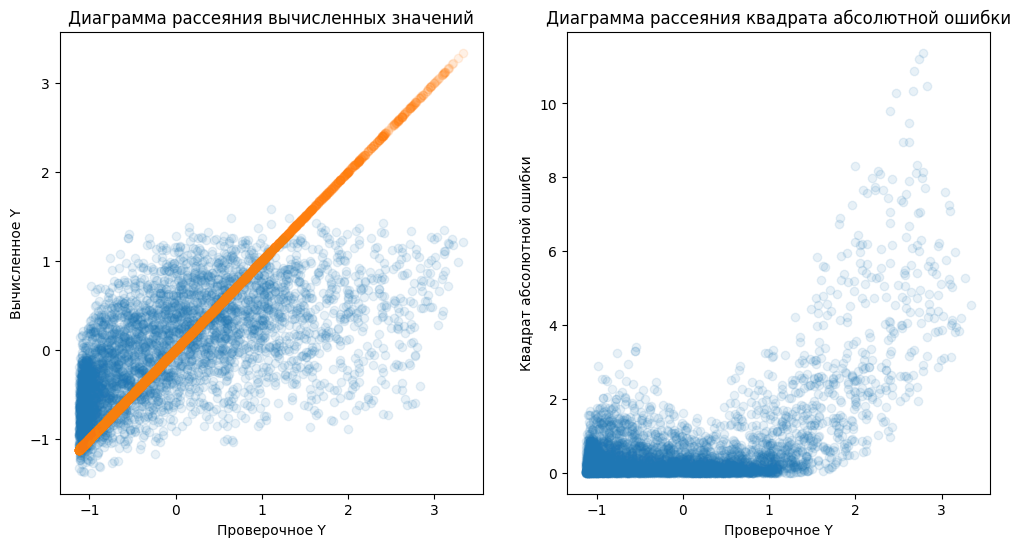

In [24]:
PLOT34(yStd_test,yStd_pred)

3. Построить гистограмму остатков (разностей между вычисленными и проверочными)

Нестандартизированные данные

c:\users\user1\appdata\local\programs\python\python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\users\user1\appdata\local\programs\python\python39\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


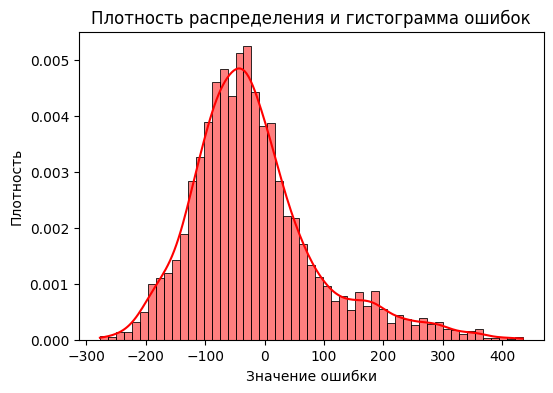

In [25]:
PLOT43(y_test,y_pred)

Стандартизированные данные

c:\users\user1\appdata\local\programs\python\python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\users\user1\appdata\local\programs\python\python39\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


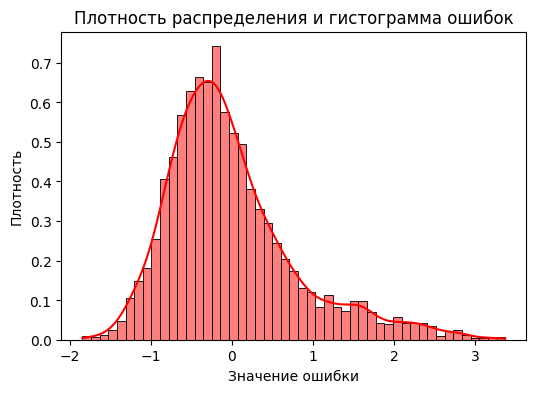

In [26]:
PLOT43(yStd_test,yStd_pred)

# Повторим действия для пунктов 3-4

## Разделите каждую из таблиц _df_ и _df_scaled_ на обучающую и проверочную части:

 1. Выберите значение для начального состояния генератора случайных чисел (ГСЧ)

In [27]:
rand_seed = 12

 2. Получите результат разделения таблицы _df_ (НЕ стандартизированная выборка): _x__train_ , _x__test_ , _y__train_ , _y__test_

In [28]:
valid_size = 0.3 # доля тестовой части в выборке
x_train, x_test, y_train, y_test =  train_test_split(
    df[features],    # исходные данные X
    df[target],      # исходные данные y

    test_size = valid_size, # доля тестовой части в выборке
    random_state=rand_seed, # начальное состояние генератора случ. чисел
    shuffle=True            # перемешивание
)
y_train = y_train['cnt']
y_test = y_test['cnt']

print(x_train[:2])
print()
print(y_train[:2])
print()
print ("Кол-во элементов: \n  x_train: {}, y_train {} \n  x_test:  {}, y_test  {} \n  total x: {}, total y {} ".format  (
    len(x_train), len(y_train),
    len(x_test),  len(x_test),
    len(x_train)+len(x_test), len(y_train)+len(x_test),
))

       hum  temp   hr  weekday  windspeed
3490  0.52  0.56  7.0      2.0     0.4179
6326  0.94  0.46  0.0      4.0     0.0000

3490    365.0
6326     26.0
Name: cnt, dtype: float64

Кол-во элементов: 
  x_train: 10464, y_train 10464 
  x_test:  4485, y_test  4485 
  total x: 14949, total y 14949 


 3. Получите результат разделения таблицы _df_scaled_ (Стандартизированная выборка): _xStd__train_ , _xStd__test_ , _yStd__train_ , _yStd__test_

In [29]:
xStd_train, xStd_test, yStd_train, yStd_test =  train_test_split(
    df_scaled[features],    # исходные данные X
    df_scaled[target],      # исходные данные y

    test_size = valid_size, # доля тестовой части в выборке
    random_state=rand_seed, # начальное состояние генератора случ. чисел
    shuffle=True            # перемешивание
)

yStd_train = yStd_train['cnt']
yStd_test = yStd_test['cnt']


print(xStd_train[:2])
print()
print(yStd_train[:2])

           hum      temp        hr   weekday  windspeed
3490 -0.661391  0.410762 -0.584461 -0.508046   2.119235
6326  1.565370 -0.112777 -1.562720  0.517513  -1.611208

3490    1.652478
6326   -0.929949
Name: cnt, dtype: float64


## Построить две модели методом SGDRegressor: на НЕ стандартизированных  (m1) и на стандартизированных (m2) данных. Для каждой из моделей m1, m2:

Нестандартизированные данные

In [30]:
# 1. Создать объект класса с моделью стохастического градиентного спуска
m1 = linear_model.SGDRegressor(
    max_iter=10000,
    tol=1e-3,
    random_state=rand_seed,
)

# 2. Обучим модель (подберем/подогоним параметры модели)  на НЕ СТАНДАРТИЗИРОВАНОМ проверочном наборе
m1.fit(  x_train,  y_train)

# 3. Получить вычисленные(predicted) зн. на НЕ СТАНДАРТИЗИРОВАНОМ проверочном наборе
y_pred = m1.predict(x_test)

print(m1.coef_)

[-136.29802329  222.5356373     5.36414066    1.55222223   21.34830937]


Стандартизированные данные

In [31]:
# 1. Создать объект класса с моделью стохастического градиентного спуска
m2 = linear_model.SGDRegressor(
    max_iter=10000,
    tol=1e-3,
    random_state=rand_seed,
)

# 2. Обучим модель (подберем/подогоним параметры модели)  на НЕ СТАНДАРТИЗИРОВАНОМ проверочном наборе
m2.fit(  xStd_train,  yStd_train)

# 3. Получить вычисленные(predicted) зн. на НЕ СТАНДАРТИЗИРОВАНОМ проверочном наборе
yStd_pred = m2.predict(xStd_test)

print(m2.coef_)

[-0.20639604  0.3241566   0.37692574  0.02098712  0.02693713]


1. Получить метрики RMSE, R2

Нестандартизированные данные

In [32]:
GET_METRICS_SINGLE(y_test,y_pred)

MAE :    78.976 (средняя абсолютная ошибка)
MSE : 11,687.404742 (среднеквадратичная ошибка)
RMSE: 108.108301 (кв. корень из среднеквадратичной ошибки)
R2  :     0.320 (коэфф. детерминации)


Стандартизированные данные

In [33]:
GET_METRICS_SINGLE(yStd_test,yStd_pred)

MAE :     0.613 (средняя абсолютная ошибка)
MSE :  0.659717 (среднеквадратичная ошибка)
RMSE:  0.812230 (кв. корень из среднеквадратичной ошибки)
R2  :     0.338 (коэфф. детерминации)


2. Построить диаграмму рассеяния вычисленных значений от проверочных значений

Нестандартизированные данные

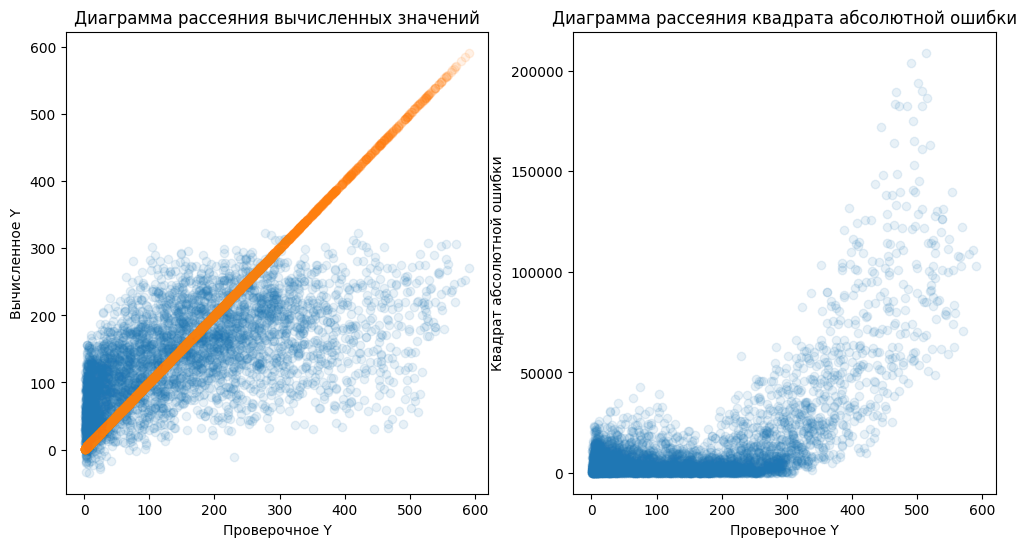

In [34]:
PLOT34(y_test,y_pred)

Стандартизированные данные

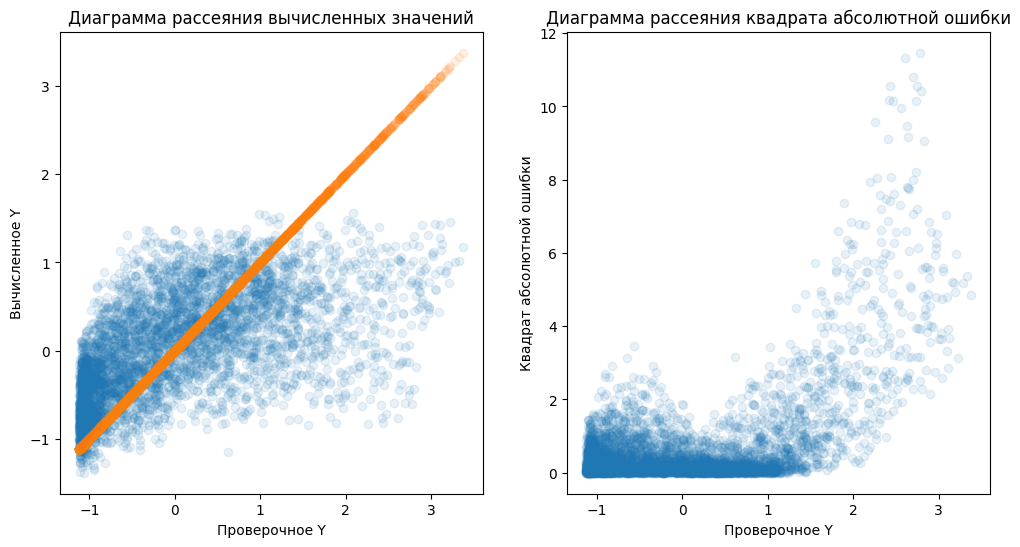

In [35]:
PLOT34(yStd_test,yStd_pred)

3. Построить гистограмму остатков (разностей между вычисленными и проверочными)

Нестандартизированные данные

c:\users\user1\appdata\local\programs\python\python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\users\user1\appdata\local\programs\python\python39\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


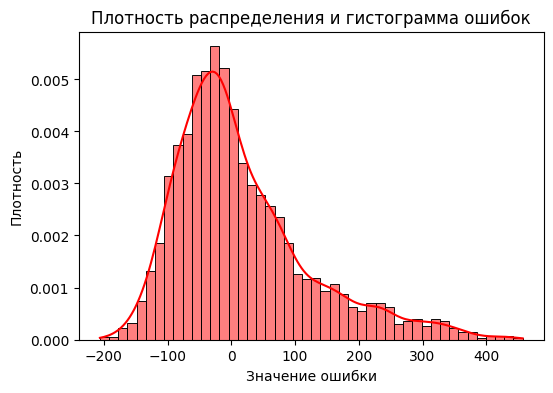

In [36]:
PLOT43(y_test,y_pred)

Стандартизированные данные

c:\users\user1\appdata\local\programs\python\python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\users\user1\appdata\local\programs\python\python39\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


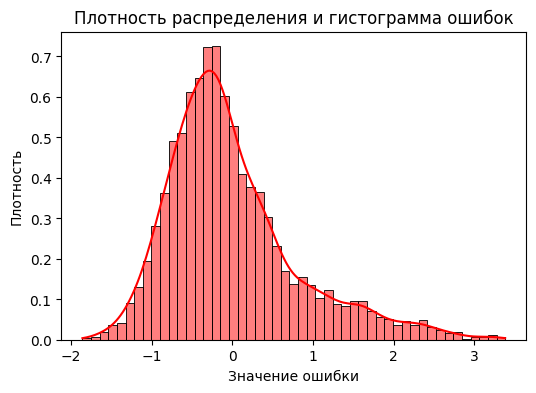

In [37]:
PLOT43(yStd_test,yStd_pred)

# Сравнение результатов и заключения

1. Влияние операции стандартизации на точность моделей (изменение R^2 и RMSE у моделей m1 и m2)

На стандартизированных данных изменился r2. Он стал немного выше, приблизительно на 10 процентов в обоих случаях. RMSE абсолютно понизился для случая со стандартизированными наборами данных. Относительную его величину оценить труднее.

2. Влияние перемешивания при разделении (изменение R^2 и RMSE при различных rand_seed)

Значение rand_seed влияет на r2 и rmse, потому что влияет на данные, попавшие в конкретную выборку. В нашем случае влияние было едва заметным. 

## Используя модель SGDRegressor и прием кросс-валидации получить на проверочной части (*_test) НЕ стандартизированных и стандартизированных данных следующие оценки точности:

In [38]:
modelForCV =  linear_model.SGDRegressor(
    max_iter=10000,
    tol=1e-3,
    random_state=rand_seed,
)

count_parts=3

1. R2(коэфф. детерминации)

In [39]:
df_scaled

,hum,temp,hr,weekday,windspeed,cnt
0,0.876134,-1.264562,-1.562720,1.543071,-1.611208,-1.006127
1,0.823116,-1.369270,-1.422969,1.543071,-1.611208,-0.823301
2,0.823116,-1.369270,-1.283218,1.543071,-1.611208,-0.884243
3,0.558025,-1.264562,-1.143467,1.543071,-1.611208,-1.028981
4,0.558025,-1.264562,-1.003715,1.543071,-1.611208,-1.120394
...,...,...,...,...,...,...
14944,-0.237246,-1.159855,1.092554,-1.020825,-0.145454,-0.221496
14945,-0.237246,-1.159855,1.232306,-1.020825,-0.145454,-0.450029
14946,-0.237246,-1.159855,1.372057,-1.020825,-0.145454,-0.442412
14947,-0.449319,-1.159855,1.511808,-1.020825,-0.412360,-0.663327


In [40]:
print("R2. НЕ Стандартизированные  проверочные данные")
scores_cross_r2 = cross_val_score(
                                    estimator = modelForCV, # Модель для обучения (вызова метода .fit())
                                    X=x_test,   # Независимые переменные
                                    y=y_test,   # Целевая переменная
                                    cv=count_parts,       # Кол-во K-частей (Fold)
                                    scoring='r2'# Режим расчитываемой метрики
                                )

print("Значения метрики по каждому блоку cv:", scores_cross_r2)
print("Усредненное значение метрики:", scores_cross_r2.mean())

print("R2. Стандартизированные  проверочные данные")

# df[features],    # исходные данные X
#     df[target],  


R2. НЕ Стандартизированные  проверочные данные
Значения метрики по каждому блоку cv: [0.23314753 0.35500011 0.34584063]
Усредненное значение метрики: 0.3113294240673539
R2. Стандартизированные  проверочные данные


In [41]:
df_scaled[features]

,hum,temp,hr,weekday,windspeed
0,0.876134,-1.264562,-1.562720,1.543071,-1.611208
1,0.823116,-1.369270,-1.422969,1.543071,-1.611208
2,0.823116,-1.369270,-1.283218,1.543071,-1.611208
3,0.558025,-1.264562,-1.143467,1.543071,-1.611208
4,0.558025,-1.264562,-1.003715,1.543071,-1.611208
...,...,...,...,...,...
14944,-0.237246,-1.159855,1.092554,-1.020825,-0.145454
14945,-0.237246,-1.159855,1.232306,-1.020825,-0.145454
14946,-0.237246,-1.159855,1.372057,-1.020825,-0.145454
14947,-0.449319,-1.159855,1.511808,-1.020825,-0.412360


In [42]:
scores_cross_r2_std = cross_val_score(
                                    estimator = modelForCV, # Модель для обучения (вызова метода .fit())
                                    X=df_scaled[features],   # Независимые переменные
                                    y=df_scaled[target],   # Целевая переменная
                                    cv=10,       # Кол-во K-частей (Fold)
                                    scoring='r2'# Режим расчитываемой метрики
                                )

print("Значения метрики по каждому блоку cv:", scores_cross_r2_std)
print("Усредненное значение метрики:", scores_cross_r2_std.mean())

c:\users\user1\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\user1\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\user1\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\user1\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:1184: DataConve

Значения метрики по каждому блоку cv: [-1.1220681   0.30702669  0.25310024  0.29446507  0.23873109  0.18101464
  0.32713553  0.39972661  0.35741281  0.19597574]
Усредненное значение метрики: 0.14325203269312486


c:\users\user1\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


2. RMSE (среднеквадратичное отклонение)

In [43]:
print("RMSE. НЕ Стандартизированные  проверочные данные")
scores_cross_rmse = cross_val_score(
                                    estimator = modelForCV, # Модель для обучения (вызова метода .fit())
                                    X=x_test,   # Независимые переменные
                                    y=y_test,   # Целевая переменная
                                    cv=count_parts,       # Кол-во K-частей (Fold)
                                    scoring='neg_root_mean_squared_error'# Режим расчитываемой метрики
                                )

print("Значения метрики по каждому блоку cv:", scores_cross_rmse)
print("Усредненное значение метрики:", scores_cross_rmse.mean())

print("RMSE. Стандартизированные  проверочные данные")
scores_cross_rmse_std = cross_val_score(
                                    estimator = modelForCV, # Модель для обучения (вызова метода .fit())
                                    X=xStd_test,   # Независимые переменные
                                    y=yStd_test,   # Целевая переменная
                                    cv=count_parts,       # Кол-во K-частей (Fold)
                                    scoring='neg_root_mean_squared_error'# Режим расчитываемой метрики
                                )

print("Значения метрики по каждому блоку cv:", scores_cross_rmse_std)
print("Усредненное значение метрики:", scores_cross_rmse_std.mean())



RMSE. НЕ Стандартизированные  проверочные данные
Значения метрики по каждому блоку cv: [-115.68302255 -104.34095239 -106.13951421]
Усредненное значение метрики: -108.72116305026584
RMSE. Стандартизированные  проверочные данные
Значения метрики по каждому блоку cv: [-0.84235941 -0.78803785 -0.80545731]
Усредненное значение метрики: -0.8119515247500839


In [44]:
ddf = pd.DataFrame (
    {
        # "Оценка": ["на станд.", "на не стандарт."],
        "Разделений":       [count_parts,     count_parts],
        "R2":       [scores_cross_r2,     scores_cross_r2_std],
        "R2 средн":       [scores_cross_r2.mean(),     scores_cross_r2_std.mean()],
        "RMSE":   [scores_cross_rmse,     scores_cross_rmse_std],
        "RMSE средн":      [scores_cross_rmse.mean(),     scores_cross_rmse_std.mean()]
    }
     ,   index=["нестанд.", "стандарт."]
 )
# print(ddf)
# print(ddf.transpose())
ddf.transpose()

,нестанд.,стандарт.
Разделений,3,3
R2,"[0.23314752673445105, 0.35500011177843827, 0.3...","[-1.1220680984520701, 0.3070266926372114, 0.25..."
R2 средн,0.311329,0.143252
RMSE,"[-115.68302255088379, -104.34095239308098, -10...","[-0.8423594142425055, -0.7880378473800658, -0...."
RMSE средн,-108.721163,-0.811952


При кросс-валидации выборка делится на несколько частей и для каждой из них находятся нужные значения, которые позже усредняются. Коридор расширяется для нестандартизированных переменных.

# Итоговые, сводные результаты и выводы.

В ходе выполнения данной лабораторной работы было проведено знакомство и освоение работы с дополнительными методами машинного обучения для решения задачи регрессии библиотеки sklearn. Был проведено два исследования. 
<br>
Первое заключалось в установлении значимости стандартизированных и нестандартизированных данных. Стандартизированные данные лучше обрабатываются.
<br>
Второе исследование представляло собой эксперимент с генератором случайных чисел. При разных значениях ГСЧ мы получаем разные результаты, но они практически похожи. То есть их значение слабо влияет на результат. Также можно разделять данные на некоторое число выборок, усредняя впоследствии их значения.